<a href="https://colab.research.google.com/github/mbarek2002/House-Recommandation-sys/blob/main/mnist_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


##Preprocessing

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)


# Inspect a batch
for images, labels in train_ds.take(1):
    print(f"Image batch shape: {images.shape}")

    print(f"Label batch shape: {labels.shape}")

Image batch shape: (64, 28, 28, 1)
Label batch shape: (64,)


#Model
##Outline the model

In [7]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Choose the optimizer and the loss function

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training

In [9]:
NUM_EPOCHS = 5

model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=test_ds)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8664 - loss: 0.4400 - val_accuracy: 0.9864 - val_loss: 0.0455
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9826 - loss: 0.0567 - val_accuracy: 0.9898 - val_loss: 0.0346
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.9880 - loss: 0.0372 - val_accuracy: 0.9901 - val_loss: 0.0293
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.9875 - val_loss: 0.0368
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 0.9911 - val_loss: 0.0284


#**Test the model**

In [10]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9873 - loss: 0.0398
Test accuracy: 0.991100013256073


#**Make Predictions **

In [11]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


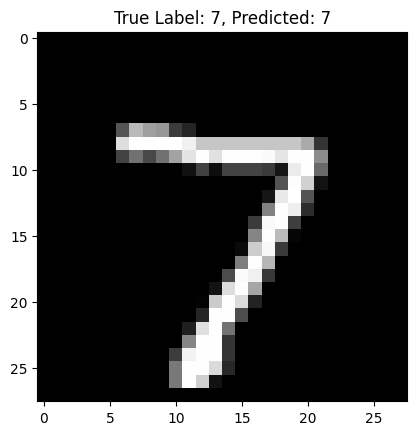

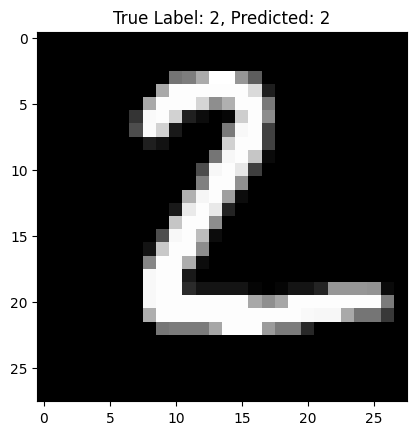

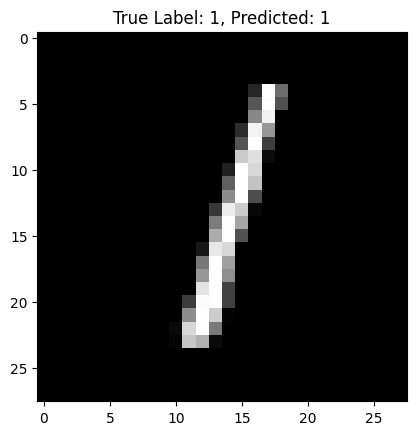

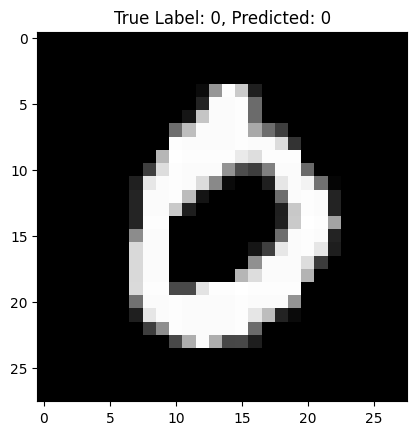

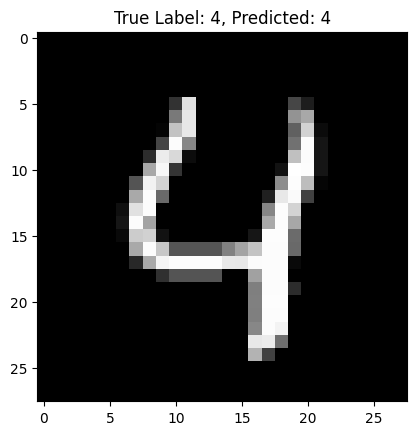

In [12]:
import numpy as np

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.show()


#Make Predictions

In [16]:
# Assuming test_ds is the test dataset and it is batched
y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(model.predict(images).argmax(axis=1))  # Predicted labels (class with the highest probability)

y_true = np.array(y_true)
y_pred = np.array(y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━

#Compute Confusion Matrix

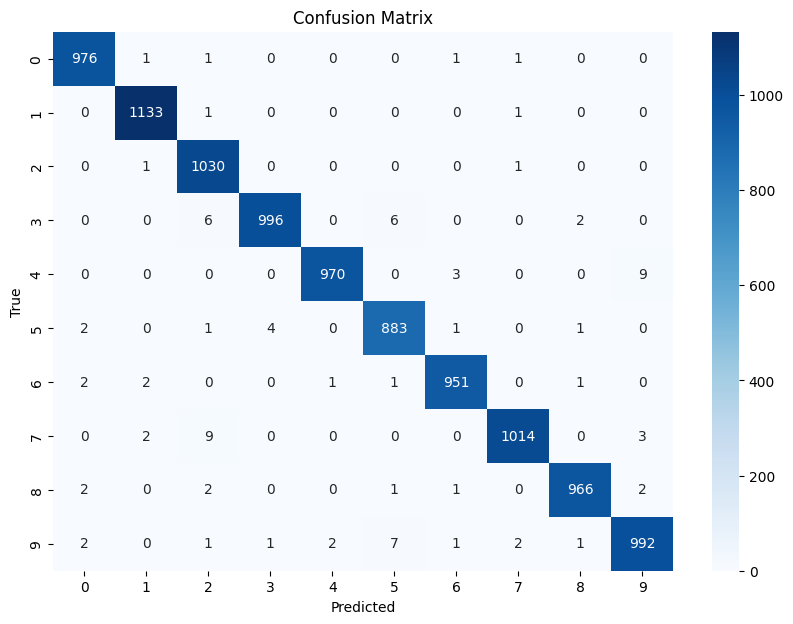

In [17]:
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
